In [5]:
import sys

!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install tensorflow

In [6]:
TABULARTRAINING = 'KORL_avatar_train.csv'
TABULARTEST = 'KORL_avatar_test_X.csv'
IMAGELOCATION = r'.'

In [7]:
import numpy as np
import matplotlib.pylab as plt
import cv2
import pandas as pd

%matplotlib inline

In [8]:
# Load the tabular data for references
# needed for appending

train_df = pd.read_csv(TABULARTRAINING)

In [9]:
train_df.head()

,Patient_ID,OMS,Sexe,Age,Date_biopsie,Age_diag,Date_derniere_nouvelles,Deces,Recidive,localisation,RNA_scope,T,N,M,Tabac,Alcool,OS
0,824635,0,1,1965-05-11,2014-03-28,48,2019-11-06,0,0,Oropharynx,2,1,2a,0,3,1,61
1,829316,1,0,1942-12-06,2014-01-01,71,2018-01-09,1,0,Oropharynx,2,3,2b,0,0,1,56
2,82dfbb,1,1,1963-02-05,2012-03-28,48,2020-08-27,1,0,Oropharynx,1,4,2,0,0,1,101
3,832c5f,1,1,1957-11-27,2013-10-25,55,2014-10-25,1,1,Oropharynx,2,2,2b,0,2,1,12
4,837956,0,1,1959-03-15,2012-06-09,53,2021-04-06,0,0,Oropharynx,1,4,1,0,3,1,103


In [10]:
# Convert the images into a numpy data
    
from PIL import Image
from numpy import asarray
import os

path = IMAGELOCATION
list_of_files = []


for root, dirs, files in os.walk(path):
    for file in files:
        list_of_files.append(os.path.join(root,file))
        
l = []
m = None
n = 0
Y = []
YDead = []
for name in list_of_files:
    # load the image and convert into 
    # numpy array
    try:
        img = Image.open(name)
        numpydata = asarray(img)
        
        # Connect the meta data here
        Y.append(((train_df.loc[train_df['Patient_ID'] == (name.split('_')[0].split('/')[2])])['OS']).item())
        YDead.append(((train_df.loc[train_df['Patient_ID'] == (name.split('_')[0].split('/')[2])])['Deces']).item())

        l.append(numpydata)
    except Exception as e:
        pass


arr = np.array(l)

print(Y)

#DESIRED: [(x, 1404, 1872, 3]

[78, 103, 25, 28, 67, 62, 81, 66, 50, 26, 29, 67, 8, 101, 4, 50, 21, 62, 71, 13, 5, 75, 48, 80, 29, 77, 48, 7, 4, 8, 81, 78, 4, 78, 19, 21, 75, 19, 1, 81, 7, 46, 8, 12, 65, 80, 26, 68, 26, 82, 82, 19, 67, 28, 25, 27, 80, 71, 62, 46, 78, 101, 65, 4, 81, 66, 19, 25, 56, 19, 26, 71, 15, 103, 21, 1, 80, 66, 75, 19, 75, 67, 46, 62, 8, 101, 80, 77, 4, 28, 82, 82, 78, 50, 29, 65, 68, 81, 67, 103, 19, 27, 80, 67, 19, 66, 25, 101, 77, 19, 12, 28, 78, 12, 19, 81, 1, 80, 103, 48, 13, 67, 78, 1, 80, 81, 81, 21, 67, 12, 77, 29, 46, 27, 65, 50, 48]


In [11]:
Y = np.asarray(Y)
YDead = np.asarray(YDead)

In [12]:
print(Y)

[ 78 103  25  28  67  62  81  66  50  26  29  67   8 101   4  50  21  62
  71  13   5  75  48  80  29  77  48   7   4   8  81  78   4  78  19  21
  75  19   1  81   7  46   8  12  65  80  26  68  26  82  82  19  67  28
  25  27  80  71  62  46  78 101  65   4  81  66  19  25  56  19  26  71
  15 103  21   1  80  66  75  19  75  67  46  62   8 101  80  77   4  28
  82  82  78  50  29  65  68  81  67 103  19  27  80  67  19  66  25 101
  77  19  12  28  78  12  19  81   1  80 103  48  13  67  78   1  80  81
  81  21  67  12  77  29  46  27  65  50  48]


In [13]:
X = arr # images

In [14]:
print(X.shape)
print(Y.shape)

(137, 1404, 1872, 3)
(137,)


In [11]:
# How many images ?

print('Total number of images : {}'.format(len(X)))
print('Total number of LABELS : {}'.format(len(Y)))

# What is the size of the images ?

print('Image shape (number of rows, number of columns, channels RGB): {}'.format(X[0].shape))

Total number of images : 137
Total number of LABELS : 137
Image shape (number of rows, number of columns, channels RGB): (1404, 1872, 3)


In [12]:
from sklearn.model_selection import StratifiedKFold as KFold

# Prepare the folds for a cross validation. We use the very useful scikit learn package. Here we use stratified 
# cross validation : the proportion of positive and negative examples is the same in all folds

N = len(X)
folds = lambda : KFold(n_splits = 5, shuffle = True, random_state=0).split(X, Y)

# Let's have a look to the split size and 

for i, (train_indexes, test_indexes) in enumerate(folds()):
    print('split {}: training : {} images, test : {} images'.format(i + 1, len(train_indexes), len(test_indexes)))

split 1: training : 109 images, test : 28 images
split 2: training : 109 images, test : 28 images
split 3: training : 110 images, test : 27 images
split 4: training : 110 images, test : 27 images
split 5: training : 110 images, test : 27 images


/home/vikram/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(109, 1404, 1872, 3)
(28, 1404, 1872, 3)
(109,)
(28,)


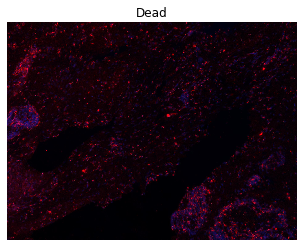

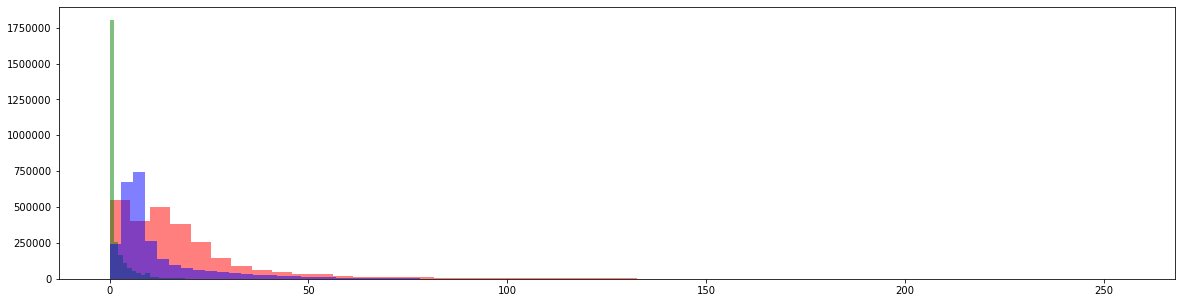

In [14]:
i= 8 # Try 0, 1, 2.. for negative images and -1, -2, -3 for positive images and compare the histograms.
xi = X[i]

plt.imshow(xi)
plt.axis('off')
plt.title('Dead' if Y[i] else 'not dead')

plt.figure(figsize=(20,5))
n_bins = 50
plt.hist(xi[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
plt.hist(xi[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
plt.hist(xi[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);

In [15]:
# Our feature will be the concatenation of the 3  histograms: red, green and blue. 

histogram_features = []
n_bins = 15 # We decide to keep 50 bins in the histogram, but you can try other values ! (up to 255)
for xi in X:
    hr = np.histogram(xi[:,:,0].flatten(), bins= n_bins)[0]
    hg = np.histogram(xi[:,:,1].flatten(), bins= n_bins)[0]
    hb = np.histogram(xi[:,:,2].flatten(), bins= n_bins)[0]
    hi = np.concatenate([hr, hg, hb])
    histogram_features.append(hi)

histogram_features = np.array(histogram_features)

print('histogram shape : ', histogram_features.shape)

histogram shape :  (137, 45)


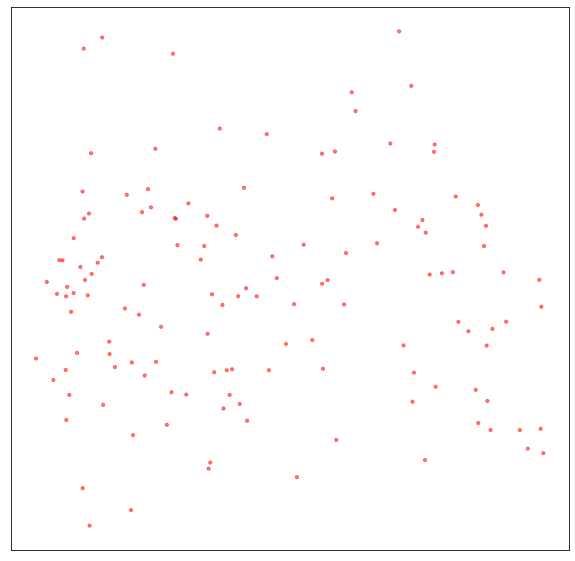

In [16]:

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, SpectralEmbedding

model = PCA(n_components=2) # Try to replace PCA by SpectralEmbedding, TSNE !
PC = model.fit_transform(histogram_features)

plt.figure(figsize=(10,10))
plt.scatter(PC[:,0], PC[:, 1], s= 10, c=['r' if yi else 'b' for yi in Y], alpha = 0.5)
plt.xticks([]);
plt.yticks([]);

# KNN For Dead - Categorical

/home/vikram/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


10 first predictions in probability : [0.  0.2 0.2 0.  0.4 0.  0.  0.2 0.6 0.4]
10 first predictions 0/1 :  [0 0 0 0 0 0 0 0 1 0]
10 first real labels     :  [0 0 0 0 0 0 0 0 0 1]
Accuracy : 74.45%
Confusion matrix (see wikipedia for more info)
[[79 17]
 [18 23]]
AUC is the probability for a positive image to have a higher score than a negative image


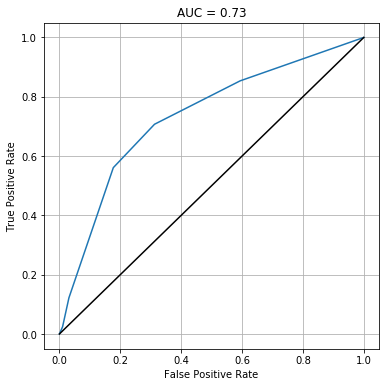

In [17]:

# Here we will use the k nearest neighbors algorithm : given a new image, find the k (e.g. k=10) images in the training set
# with the most similar histograms. If m of these neighors (e.g m=6) have label 1, then output p = 60%.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

# This function run train the model ! 
def run_model(model, features):
    Y_pred = np.zeros(YDead.shape)
    # For each fold :
    for train_indexes, valid_indexes in folds():
        # Train the model on the training data
        model.fit(features[train_indexes], YDead[train_indexes])
        # And predict the results on the test data
        Y_pred[valid_indexes] = model.predict_proba(features[valid_indexes])[:,1]
    # Return all the predictions (probabilities between 0 and 1)
    return Y_pred

# Here we use kNN model : 
model = KNeighborsClassifier(n_neighbors=5, n_jobs=8)
# And call the function run_model
Y_pred = run_model(model, histogram_features)

# Let's print the results
print('10 first predictions in probability : {}'.format(Y_pred[:10]))
Y_pred_01 = (Y_pred > 0.5).astype('int')
print('10 first predictions 0/1 :  {}'.format(Y_pred_01[:10]))
print('10 first real labels     :  {}'.format(YDead[:10]))
print('Accuracy : {:.2f}%'.format(100 * np.mean(YDead == Y_pred_01)))

print('Confusion matrix (see wikipedia for more info)')
print(confusion_matrix(YDead, Y_pred_01))


plt.figure(figsize=(6,6))
fpr, tpr, _ = roc_curve(YDead, Y_pred)
plt.plot(fpr, tpr)
plt.title('AUC = {:.2f}'.format(roc_auc_score(YDead, Y_pred)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.plot([0,1],[0,1], 'black')
print('AUC is the probability for a positive image to have a higher score than a negative image')

In [18]:
# How does the accuracy evolves with the number of neighbors ?

def plot_accuracy(model, features, x_range):

    accuracy = []
    for x in x_range:
        accuracy.append(np.mean(YDead == (run_model(model(x), features) > 0.5).astype('int')))
        print('accuracy = {:.2f}% at x = {}'.format(100*accuracy[-1], x))
    plt.figure(figsize=(10,5))
    plt.plot(x_range, accuracy)
    plt.xlabel('Number of neighbors')
    plt.xticks(x_range)
    plt.ylabel('Accuracy')
    plt.title('Max = {:.2f}% at x = {}'.format(100*np.max(accuracy), x_range[np.argmax(accuracy)]))
    plt.grid()
    


# BUILD FEATURES WITH RESNET50

In [15]:
from keras.applications.resnet import ResNet50, preprocess_input
import cv2

model = ResNet50(weights='imagenet', include_top=False, pooling='max')
X_224 = np.array([cv2.resize(xi, (224, 224)) for xi in X])
X_224 = preprocess_input(X_224.astype('float'))
resnet_features = model.predict(X_224, verbose=1)

model.save("resnet1")

5/5 [==============================] - 28s 6s/step
INFO:tensorflow:Assets written to: resnet1/assets


/home/vikram/.local/lib/python3.8/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/home/vikram/.local/lib/python3.8/site-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


In [20]:
resnet_features.shape

(137, 2048)

/home/vikram/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/vikram/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


accuracy = 68.61% at x = 5
accuracy = 70.07% at x = 10
accuracy = 70.07% at x = 15


/home/vikram/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/vikram/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


accuracy = 70.80% at x = 20


/home/vikram/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


accuracy = 71.53% at x = 25


/home/vikram/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


accuracy = 70.80% at x = 30
accuracy = 70.07% at x = 35


/home/vikram/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/vikram/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


accuracy = 70.07% at x = 40


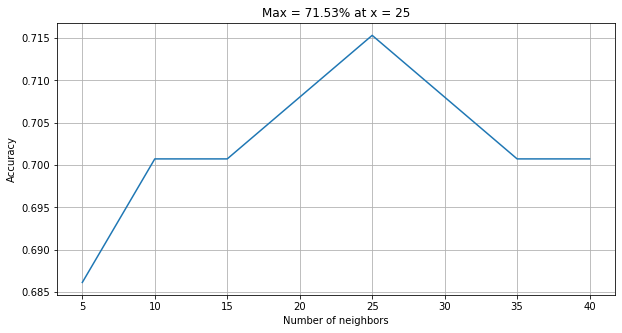

In [21]:
plot_accuracy(lambda k : KNeighborsClassifier(n_neighbors=k, n_jobs=8), resnet_features, range(5,45,5))

# BUILD WITH XGBOOST

In [22]:
# append meta data to the resnet features



In [23]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(resnet_features, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

RegModel=XGBRegressor(max_depth=3, learning_rate=0.5, n_estimators=500, objective='reg:linear', booster='gbtree')

#Printing all the parameters of XGBoost
print(RegModel)

#Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)
prediction = np.absolute(prediction)

#Measuring Goodness of fit in Training data
print('MAPE Value:',metrics.mean_absolute_percentage_error(y_test, prediction))

#Measuring accuracy on Testing Data
print(prediction)
print(y_train)

(109, 2048)
(28, 2048)
(109,)
(28,)
XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.5, max_delta_step=None, max_depth=3,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
             subsample=None, tree_method=None, validate_parameters=None,
             verbosity=None)
[19:20:01] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
MAPE Value: 4.593275170496077
[51.247425  66.69684   66.56775   65.870125  74.91706   66.91653
  0.9593712 65.94283   80.73268   74.

In [25]:
!mkdir -p saved_model
XGB.save_model("layer1.json")